Data imported successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


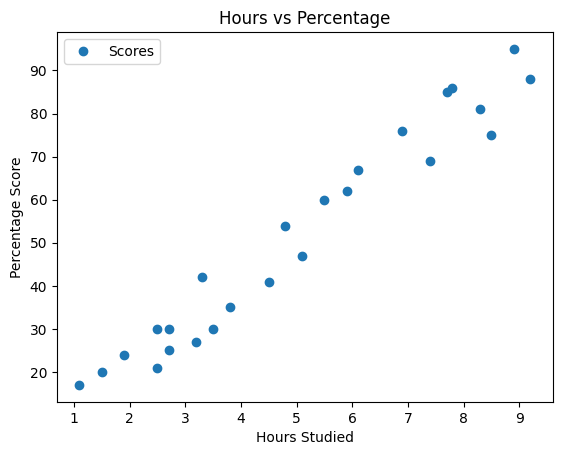

Training complete.


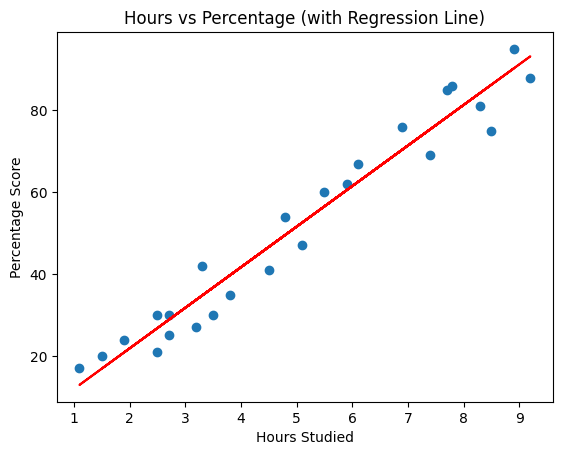

Test data (in hours):
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Comparison of Actual vs Predicted Scores:
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
No of Hours = 9.25
Predicted Score = 93.69173248737535
Mean Absolute Error: 4.183859899002975


In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

# Displaying the first 10 rows of the dataset
print(s_data.head(10))

# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red')  # Adding color to the regression line for better visibility
plt.title('Hours vs Percentage (with Regression Line)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Testing data - In Hours
print("Test data (in hours):")
print(X_test) 

# Predicting the scores
y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print("Comparison of Actual vs Predicted Scores:")
print(df)

# Predicting with custom input
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

# Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
